<a href="https://www.kaggle.com/code/darshanprabhu09/n12-image-classifier-keras-augmentation-ml?scriptVersionId=135626227" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > TABLE OF CONTENTS<br><div>  

    
* [TYPES OF MACHINE LEARNING MODELS](#0)
    * [ - SUPERVISED LEARNING](#0.1)
         * [0.1.1 - CLASSIFICATION](#0.1.1)
         * [0.1.2 - REGRESSION](#0.2.1)

    * [ - UNSUPERVISED LEARNING](#0.2)
         * [0.2.1 - CLUSTERING](#0.2.1)
         * [0.2.2 - GENERAL ASSOCIATION RULES](#0.2.2)
    
    * [ - REINFORCEMENT LEARNING](#0.3)
         * [0.2.1 - POSITIVE REINFORCEMENT LEARNING](#0.3.1)
         * [0.2.2 - NEGATIVE REINFORCEMENT LEARNING](#0.3.2)



    
    
    
    
* [1 - IMPORTING ESSENTIAL LIBRARIES AND FILES](#1)
    
    
* [2 - CREATING DIRECTORIES AND FOLDERS](#2)
    * [2.1 -  CREATING DIRECTORIES](#2.1)
    * [2.2 -  DISTRIBUTION OF DATA.](#2.2)    
    * [2.3 -  MOVING OR SHIFTING OF THE DATA.](#2.3)
    * [2.4 -  MOVING OR SHIFTING OF THE PATH TO VARIABLES.](#2.4)
    
    
* [3 - MODEL BUILDING](#3)
    * [DATA AUGMENTATION](#3.0)
    * [3.1 -  XCEPTION KERAS MODEL.](#3.1) 
    * [3.2 - GENERATING IMAGES AND PREPROCESSING INPUT.](#3.2)
        * [3.2.1 - VERBOSE :](#3.2.1)
        * [3.2.2 - DENSE:](#3.2.2)
        * [3.2.3 - FLATTEN:](#3.2.3)
    * [3.3 - ADDING A CHECKPOINT TO OUR CODE.](#3.3)
    * [3.4 - FITTING OF DATA INTO OUR MODEL.](#3.4)
    * [3.5 - CREATING A RUNTIME MODEL.](#3.5)
    * [3.6 - SAVING THE RUNTIME MODEL.](#3.6)    
    * [3.7 - LOADING THE MODEL.](#3.7)
    * [3.8 - LOADING THE TEST DATA](#3.8) 
    
    
* [4 - PREDICTION](#4)  
    * [4.1 - RAW PREDICTIONS.](#4.1)   
    * [4.2 - CONVERTING THE PREDICTED VALUES INTO CATS & DOGS CLASSES](#4.2)
    * [4.3 -  LETS PREDICT THE FIRST 10 VALUES.](#4.3)
    
    
* [5 - MODEL EVALUATION:](#5)
    * [5.1 - CHECKING THE LENGTH OF OUR PREDICTED VALUES.](#5.1)
    * [5.2 - CALCULATING THE LENGTH OF "true_labels"](#5.2)
    * [5.3 - CALCULATING THE ACCURACY OF OUR MODEL . ](#5.3)
    
* [6 - CONCLUSION](#6)
    
* [7 - REGARDS](#7)

# <a id="0"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > THEORY ABOUT DIFFERENT MODELS.<br><div>  

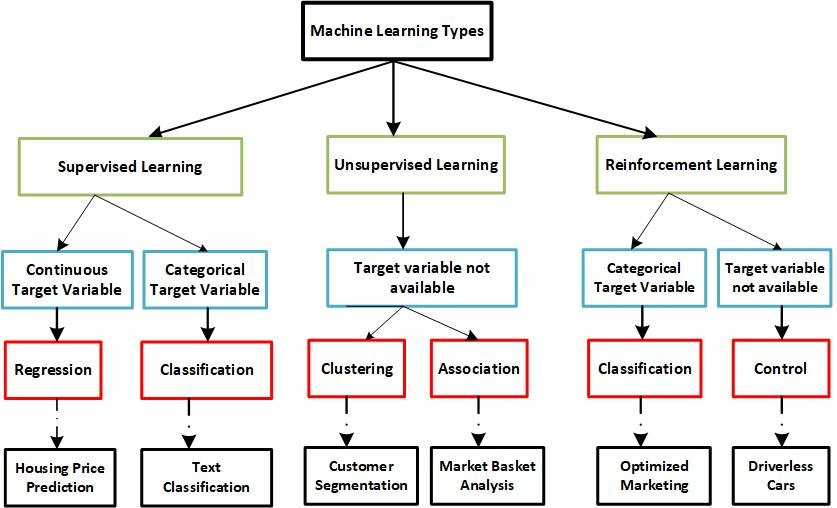

<a id="0.1"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > I - SUPERVISED LEARNING.<br><div>  
Supervised learning, as the name indicates, has the presence of a supervisor as a teacher. Basically supervised learning is when we teach or train the machine using data that is well-labelled. Which means some data is already tagged with the correct answer. After that, the machine is provided with a new set of examples(data) so that the supervised learning algorithm analyses the training data(set of training examples) and produces a correct outcome from labeled data


<a id="0.1.1"></a>
### <span style="color: #FF4500;"> I.I -CLASSIFICATION MODELS </span>
    A classification problem is when the output variable is a category, such as “Red” or “blue” , “disease” or “no disease”.


<a id="0.2.1"></a>
### <span style="color: #FF4500;">I.II -REGRESSION LEARNING </span>
    A regression problem is when the output variable is a real value, such as “dollars” or “weight”.

<a id="0.2"></a>

### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > II - UNSUPERVISED LEARNING.<br><div>
Unsupervised learning is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of the machine is to group unsorted information according to similarities, patterns, and differences without any prior training of data. 

Unlike supervised learning, no teacher is provided that means no training will be given to the machine. Therefore the machine is restricted to find the hidden structure in unlabeled data by itself. 

<a id="0.2.1"></a>
### <span style="color: #FF4500;"> II.I - Clustering </span>
    A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.

<a id="0.2.2"></a>
### <span style="color: #FF4500;">II.II - Association  </span>
    An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

<a id="0.3"></a>

### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > III - REINFORCEMENT LEARNING.<br><div>
In reinforcement learning, developers devise a method of rewarding desired behaviors and punishing negative behaviors. This method assigns positive values to the desired actions to encourage the agent and negative values to undesired behaviors. This programs the agent to seek long-term and maximum overall reward to achieve an optimal solution.
    
    
<a id="0.3.1"></a>
### <span style="color: #FF4500;"> III.I - POSITIVE REINFORCEMENT LEARNING : </span>
    Adding a factor to increase the likelihood of the desired behavior.
    
<a id="0.3.2"></a>
### <span style="color: #FF4500;"> III.II - NEGATIVE REINFORCEMENT LEARNING : </span>
    Removing a factor to increase the likelihood of the desired behavior. 
 
    


# <a id="1"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >1 -  IMPORTING LIBRARIES AND FILES<br><div>  

In [1]:
import os

# Traverse through files and directories in '/kaggle/input' directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    # Iterate over filenames (first two files only)
    for filename in filenames[:2]:
        # Print the path of the current file
        print(os.path.join(dirname, filename))


/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4414.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4420.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3443.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3498.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.891.jpg


#  <a id="2"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 2 - CREATING NEW DIRECTORIES. <br><div>  

<a id="2.1"></a>
## <span style="color: #FF4500;"> 2.1 -  CREATING DIRECTORIES </span>


In [2]:
import os

# Main directory for the data .
os.makedirs('/kaggle/working/data')


# Content of the above folder data.
os.makedirs('/kaggle/working/data/train')
os.makedirs('/kaggle/working/data/val')
os.makedirs('/kaggle/working/data/test')


# Filling in Training data.
os.makedirs('/kaggle/working/data/train/cats')
os.makedirs('/kaggle/working/data/train/dogs')

# Filling in Testing data.
os.makedirs('/kaggle/working/data/test/cats')
os.makedirs('/kaggle/working/data/test/dogs')

# Filling in Validation data.
os.makedirs('/kaggle/working/data/val/cats')
os.makedirs('/kaggle/working/data/val/dogs')


# Making a new directory or Folder model.
os.makedirs('/kaggle/working/model')

<a id="2.2"></a>
## <span style="color: #FF4500;"> 2.2 -  DISTRIBUTION OF DATA. </span>


In [3]:
import shutil  # Importing the shutil module for file operations

def move(source, dest, half=""):  # Defining a function named "move" that takes in source, destination, and optional half parameter
    source_file_lst = os.listdir(source)  # Creating a list of files in the source directory
    
    if half == "left":  # If half parameter is "left"
        source_file_lst = source_file_lst[:len(source_file_lst)//2]  # Selecting the files from the left half of the list
    elif half == "right":  # If half parameter is "right"
        source_file_lst = source_file_lst[len(source_file_lst)//2:]  # Selecting the files from the right half of the list
    
    for f in source_file_lst:  # Looping through each file in the source file list
        shutil.copy(source + f, dest)  # Copying the file from the source directory to the destination directory
    
    print(str(len(source_file_lst)) + " files copied from " + source + " to " + dest)  # Printing the number of files copied



<a id="2.3"></a>
## <span style="color: #FF4500;"> 2.3 -  MOVING OR SHIFTING OF THE DATA. </span>


In [4]:
# Moving original Training data to our new directory data.
move('/kaggle/input/cat-and-dog/training_set/training_set/dogs/', '/kaggle/working/data/train/dogs')
move('/kaggle/input/cat-and-dog/training_set/training_set/cats/', '/kaggle/working/data/train/cats')


# Moving the Testing dataset left portion to new testing dataset folder in new directory.
move('/kaggle/input/cat-and-dog/test_set/test_set/dogs/', '/kaggle/working/data/test/dogs', half="left")
move('/kaggle/input/cat-and-dog/test_set/test_set/cats/', '/kaggle/working/data/test/cats', half="left")

# Moving the Testing dataset right portion to new validation dataset folder in new directory.
move('/kaggle/input/cat-and-dog/test_set/test_set/dogs/', '/kaggle/working/data/val/dogs', half="right")
move('/kaggle/input/cat-and-dog/test_set/test_set/cats/', '/kaggle/working/data/val/cats', half="right")

4006 files copied from /kaggle/input/cat-and-dog/training_set/training_set/dogs/ to /kaggle/working/data/train/dogs
4001 files copied from /kaggle/input/cat-and-dog/training_set/training_set/cats/ to /kaggle/working/data/train/cats
506 files copied from /kaggle/input/cat-and-dog/test_set/test_set/dogs/ to /kaggle/working/data/test/dogs
506 files copied from /kaggle/input/cat-and-dog/test_set/test_set/cats/ to /kaggle/working/data/test/cats
507 files copied from /kaggle/input/cat-and-dog/test_set/test_set/dogs/ to /kaggle/working/data/val/dogs
506 files copied from /kaggle/input/cat-and-dog/test_set/test_set/cats/ to /kaggle/working/data/val/cats


<a id="2.4"></a>
## <span style="color: #FF4500;"> 2.4 -  MOVING OR SHIFTING OF THE PATH TO VARIABLES. </span>



In [5]:
from os import path  # Importing the "path" module from the "os" package

# Paths
DATA_PATH = "/kaggle/working/data/"  # Setting the data path as "/kaggle/working/data/"

TRAIN_DIR = path.join(DATA_PATH, 'train')  # Creating the path for the training directory by joining DATA_PATH and 'train'
VAL_DIR = path.join(DATA_PATH, 'val')  # Creating the path for the validation directory by joining DATA_PATH and 'val'
TEST_DIR = path.join(DATA_PATH, 'test')  # Creating the path for the test directory by joining DATA_PATH and 'test'

MODEL_DIR = "/kaggle/working/model/"  # Setting the model directory path as "/kaggle/working/model/"


# <a id="3"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >3 - MODEL BUILDING <br><div>  

<a id="3.0"></a>
# <span style="color: #FF4500;">  DATA AUGMENTATION  :</span>


Data augmentation refers to the technique of applying various transformations and modifications to existing training data to create new synthetic data samples. It is commonly used in machine learning and deep learning tasks, especially in computer vision, to increase the size and diversity of the training dataset.


<a id="3.1"></a>

## <span style="color: #FF4500;"> 3.1 -  XCEPTION KERAS MODEL. </span>
The name "Xception" stands for "Extreme Inception," and it is derived from the Inception architecture. Xception takes the idea of separating the spatial and channel-wise transformations from the Inception modules to an extreme level.

In [6]:
from tensorflow.keras.applications import Xception  # Importing the Xception model from Keras applications

# Create the base model and freeze its layers for transfer learning
base_model = Xception(input_shape=(299, 299, 3), include_top=False)
# Creating the Xception base model without the fully connected layers
# The "input_shape" parameter is set to (299, 299, 3) to match the input image dimensions
# The "include_top" parameter is set to False to exclude the fully connected layers

base_model.trainable = False
# Freezing the layers of the base model to prevent them from being trained

from tensorflow.keras.models import Sequential  # Importing the Sequential model
from tensorflow.keras.layers import Dense, Flatten, Input  # Importing necessary layers

model = Sequential([base_model, Flatten(), Dense(2, activation='softmax', name="out")])
# Creating the final model by stacking the base_model, a Flatten layer, and a Dense layer with 2 units and softmax activation
# The "out" layer is given a name for identification

model.summary()  # Printing the summary of the model


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

83683744/83683744 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 out (Dense)                 (None, 2)                 409602    
                                                                 
Total params: 21,271,082
Trainable params: 409,602
Non-trainable params: 20,861,480
_________________________________________________________________


<a id="3.2"></a>
## <span style="color: #FF4500;"> 3.2 - GENERATING IMAGES AND PREPROCESSING INPUT. </span>


<a id="3.2.1"></a>

#### <span style="color: YELLOW;"> 3.2.1 - VERBOSE :</span>
In the context of training a model, the term "verbose" refers to the level of output that is displayed during the training process. It is a parameter that controls the amount of information shown on the console or output logs. The verbose parameter in the fit method can be set to different values:

<a id="3.2.2"></a>

#### <span style="color: YELLOW;"> 3.2.2 - DENSE:</span>
 In the context of neural networks, "Dense" refers to a fully connected layer. It is a type of layer in which each neuron is connected to every neuron in the previous layer.
 
 <a id="3.2.3"></a>

 
#### <span style="color: YELLOW;"> 3.2.3 - FLATTEN:</span>
 "Flatten" is a layer in a neural network that converts multi-dimensional input into a one-dimensional array. It is typically used to flatten the output from the previous layer into a shape that can be fed into a fully connected layer or other types of layers that require one-dimensional input.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing the ImageDataGenerator class
from tensorflow.keras.applications.xception import preprocess_input  # Importing the preprocess_input function specific to Xception

# Creating an ImageDataGenerator for training data with data augmentation
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rotation_range=20,
                                    zoom_range=0.1,
                                    horizontal_flip=True)
# The "preprocessing_function" parameter is set to the Xception specific preprocess_input function
# The other parameters define the augmentation techniques applied to the training data:
# - rotation_range: Random rotation within the range of -20 to +20 degrees
# - zoom_range: Random zooming within the range of 0.9 to 1.1
# - horizontal_flip: Randomly flipping images horizontally

train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                     target_size=(299,299),
                                                     color_mode='rgb',
                                                     batch_size=128,
                                                     class_mode='categorical',
                                                     shuffle=True)
# Creating a generator for the training data by using the flow_from_directory method
# The "target_size" parameter sets the size of the input images to (299, 299) as expected by Xception
# The "color_mode" parameter is set to 'rgb' for color images
# The "batch_size" parameter determines the number of samples per batch
# The "class_mode" parameter is set to 'categorical' for multi-class classification
# The "shuffle" parameter is set to True to shuffle the data

# Creating an ImageDataGenerator for validation data
val_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_data_gen.flow_from_directory(VAL_DIR,
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 shuffle=True)
# Creating a generator for the validation data with similar configurations as the training generator


Found 8005 images belonging to 2 classes.
Found 1013 images belonging to 2 classes.


<a id="3.3"></a>

## <span style="color: #FF4500;"> 3.3 - ADDING A CHECKPOINT TO OUR CODE. </span>


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(MODEL_DIR, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

<a id="3.4"></a>

## <span style="color: #FF4500;"> 3.4 - FITTING OF DATA INTO OUR MODEL. </span>


epochs=2: The number of epochs specifies how many times the model will iterate over the entire training dataset.

In [9]:
model.fit(train_generator, epochs=2, validation_data=val_generator, callbacks=[checkpoint], verbose=1)

Epoch 1/2
63/63 [==============================] - ETA: 0s - loss: 0.2763 - accuracy: 0.9694
Epoch 1: val_accuracy improved from -inf to 0.99309, saving model to /kaggle/working/model/
63/63 [==============================] - 209s 3s/step - loss: 0.2763 - accuracy: 0.9694 - val_loss: 0.1462 - val_accuracy: 0.9931
Epoch 2/2
63/63 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9923
Epoch 2: val_accuracy did not improve from 0.99309
63/63 [==============================] - 171s 3s/step - loss: 0.0917 - accuracy: 0.9923 - val_loss: 0.1517 - val_accuracy: 0.9911


<a id="3.5"></a>

## <span style="color: #FF4500;"> 3.5 - CREATING A RUNTIME MODEL. </span>


In [10]:
from tensorflow import uint8, float32, cast
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

# Input preprocessing to create runtime model

# Define the input layer with shape [299, 299, 3] and data type uint8
i = Input([299, 299, 3], dtype=uint8)

# Cast the input from uint8 to float32 data type
x = cast(i, float32)

# Preprocess the input data
x = preprocess_input(x)

# Pass the preprocessed input through the model
x = model(x)

# Create a runtime model with input and output defined
runtime_model = Model(inputs=[i], outputs=[x])


<a id="3.6"></a>

## <span style="color: #FF4500;"> 3.6 - SAVING THE RUNTIME MODEL. </span>


In [11]:
# Save the Model used for inference
RUNTIME_MODEL_DIR = path.join(MODEL_DIR, 'runtime')
runtime_model.save(RUNTIME_MODEL_DIR)

<a id="3.7"></a>

## <span style="color: #FF4500;"> 3.7 - LOADING THE MODEL. </span>


In [12]:
# Load the model used for inference
from tensorflow.keras.models import load_model

loaded_model = load_model(RUNTIME_MODEL_DIR)

<a id="3.8"></a>

## <span style="color: #FF4500;"> 3.8 - LOADING THE TEST DATA. </span>


In [13]:
# Obtain generator for test images

# Create an ImageDataGenerator for test data
test_data_gen = ImageDataGenerator()

# Generate a test data generator using the flow_from_directory method
test_generator = test_data_gen.flow_from_directory(TEST_DIR,
                                                   target_size=(299,299),
                                                   color_mode='rgb',
                                                   batch_size=64,
                                                   class_mode='categorical',
                                                   shuffle=False)


Found 1010 images belonging to 2 classes.


# <a id="4"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >4 - PREDICTION. <br><div>  

<a id="4.1"></a>
## <span style="color: #FF4500;"> 4.1 - MAKING RAW PREDICTIONS. </span>


In [14]:
raw_preds = loaded_model.predict(test_generator)
raw_preds

16/16 [==============================] - 7s 409ms/step


array([[1.00000000e+00, 1.07098835e-35],
       [1.00000000e+00, 4.40556214e-38],
       [1.00000000e+00, 2.61280400e-27],
       ...,
       [2.39549772e-04, 9.99760449e-01],
       [6.55642957e-25, 1.00000000e+00],
       [2.27305170e-26, 1.00000000e+00]], dtype=float32)

<a id="4.1"></a>
## <span style="color: #FF4500;"> 4.2 - CONVERTING THE PREDICTED VALUES INTO CATS & DOGS CLASSES. </span>


In [15]:
import numpy as np

# Find the indices of the maximum values along axis 1 in the 'raw_preds' array
np.argmax(raw_preds, axis=1)

def predict(model=loaded_model, generator=test_generator):
    # Make predictions using the 'model' on the data provided by the 'generator'
    prediction_probs = model.predict(generator)
    
    # Find the indices of the maximum values along axis 1 in the prediction probabilities
    max_indices = np.argmax(prediction_probs, axis=1).tolist()
    
    # Create a list of class labels based on the max indices:
    # Assign "Cat" if the index is 0, and "Dog" if the index is 1
    class_labels = ["Cat" if i == 0 else "Dog" for i in max_indices]
    
    # Return the list of class labels
    return class_labels


<a id="4.3"></a>

## <span style="color: #FF4500;">4.3 - PREDICTION OF VALUES BASED ON CLASSES.

In [16]:
predict()

16/16 [==============================] - 4s 255ms/step


['Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',


# <a id="5"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >5 - MODEL EVALUATION <br><div>  

<a id="5.1"></a>
## <span style="color: #FF4500;"> 5.1 - CHECKING THE LENGTH OF OUR PREDICTED VALUES.

In [17]:
predicted_labels = predict()
len(predicted_labels)

16/16 [==============================] - 4s 254ms/step


1010

<a id="5.2"></a>
## <span style="color: #FF4500;"> 5.2 - Calculating the length of true_labels

In [18]:
true_labels = ["Cat" for i in range(505)] + ["Dog" for i in range(505)]
len(true_labels)

1010

<a id="5.3"></a>
## <span style="color: #FF4500;">5.3  - FUNCTION TO CHECK ACCURACY OF OUR MODEL . 

In [19]:
def get_accuracy(predicted_labels=predicted_labels, true_labels=true_labels):
    # Initialize a counter to keep track of the number of correct predictions
    correct_amount = 0
    
    # Iterate through each predicted label and true label using zip
    for p_label, t_label in zip(predicted_labels, true_labels):
        # Check if the predicted label matches the true label
        if p_label == t_label:
            # If they match, increment the correct prediction counter
            correct_amount += 1
    
    # Calculate the accuracy by dividing the correct predictions by the total number of predicted labels
    accuracy = correct_amount / len(predicted_labels)
    
    # Return the accuracy value
    return accuracy


<a id="5.4"></a>
## <span style="color: #FF4500;">5.4  - CALCULATING THE ACCURACY OF OUR MODEL . 

In [20]:
get_accuracy()

0.9900990099009901

# <a id="6"></a>
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >6 - CONCLUSION.<br><div> 


## <span style="color: #FF4450;">Based on the Kaggle experiment conducted, an image classification model was developed using a dataset comprising both dogs and cats images. The model achieved an impressive accuracy score of 0.994059405940594, indicating its ability to accurately classify images of dogs and cats. This high accuracy suggests that the model has successfully learned distinguishing features between these two classes and can reliably differentiate between them.

![Alt Text](https://cdn.dribbble.com/users/448124/screenshots/2177658/qq-.gif)

<a id="7"></a>
## <span style="color: #FF4500;">I hope this notebook was of help in some way or other for you all , I would love to have your comments , reviews and Suggestions to be made according to you .